# VisDrone

In [63]:
train_dir = './data/visdrone/VisDrone2019-MOT-train/'
train_annot = './data/visdrone/full/VisDrone2019-MOT-train_cocoformat.json'

val_dir = './data/visdrone/VisDrone2019-MOT-val/'
val_annot = './data/visdrone/full/VisDrone2019-MOT-val_cocoformat.json'

test_dir = './data/visdrone/VisDrone2019-MOT-test-dev/'
test_annot = './data/visdrone/full/VisDrone2019-MOT-test-dev_cocoformat.json'

In [64]:
def read_coco(annotation_dir):
    """COCO 형식 데이터의 VisDrone json annotation file을 읽어들여서 데이터프레임, 이미지를 반환해주는 함수

    Args:
        data_dir (str): 데이터가 저장된 경로 ex) './data/visdrone/VisDrone2019-MOT-train/'
        annotation_dir (str): annotation 파일이 저장된 경로 ex) './data/visdrone/full/VisDrone2019-MOT-train_cocoformat.json'
    """
    
    with open (annotation_dir, 'r') as j:
        json_file = json.load(j)
    
    cats = pd.DataFrame(json_file['categories'])
    data = pd.DataFrame(json_file['annotations'])
    img_ids = pd.DataFrame(json_file['images'])
    temp = pd.merge(data, cats, left_on='category_id',right_on='id',how='inner').set_index('id_x').sort_index().drop(columns='id_y')
    temp2 = pd.merge(temp, img_ids, left_on='image_id', right_on='id' , how='left')
    
    temp2['img_size'] = temp2['height'] * temp2['width']
    columns = ['category_id','name','bbox','area','mot_conf','truncation','occlusion','file_name','video_id','frame_id','height','width','img_size']
    df = temp2[columns]
    df['vid_name'] = df['file_name'].apply(lambda x: x[-30:-12])
        
    return df

In [65]:
train = read_coco(train_annot)
val = read_coco(val_annot)
test = read_coco(test_annot)

/tmp/ipykernel_447426/4203492935.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vid_name'] = df['file_name'].apply(lambda x: x[-30:-12])
/tmp/ipykernel_447426/4203492935.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vid_name'] = df['file_name'].apply(lambda x: x[-30:-12])
/tmp/ipykernel_447426/4203492935.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
display(train)
display(val)
display(test)

,category_id,name,bbox,area,mot_conf,truncation,occlusion,file_name,video_id,frame_id,height,width,img_size,vid_name
0,1,pedestrian,"[1937.0, 544.0, 12.0, 26.0]",312.0,1.0,0,0,VisDrone2019-MOT-train/sequences/uav0000126_00...,1,0,1512,2688,4064256,uav0000126_00001_v
1,1,pedestrian,"[1905.0, 536.0, 12.0, 24.0]",288.0,1.0,0,0,VisDrone2019-MOT-train/sequences/uav0000126_00...,1,0,1512,2688,4064256,uav0000126_00001_v
2,3,bicycle,"[998.0, 706.0, 19.0, 33.0]",627.0,1.0,0,0,VisDrone2019-MOT-train/sequences/uav0000126_00...,1,0,1512,2688,4064256,uav0000126_00001_v
3,4,car,"[152.0, 1372.0, 176.0, 86.0]",15136.0,1.0,0,2,VisDrone2019-MOT-train/sequences/uav0000126_00...,1,0,1512,2688,4064256,uav0000126_00001_v
4,4,car,"[200.0, 1328.0, 176.0, 76.0]",13376.0,1.0,0,2,VisDrone2019-MOT-train/sequences/uav0000126_00...,1,0,1512,2688,4064256,uav0000126_00001_v
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169354,1,pedestrian,"[936.0, 597.0, 46.0, 103.0]",4738.0,1.0,0,0,VisDrone2019-MOT-train/sequences/uav0000079_00...,56,360,1071,1904,2039184,uav0000079_00480_v
1169355,1,pedestrian,"[990.0, 536.0, 75.0, 93.0]",6975.0,1.0,0,1,VisDrone2019-MOT-train/sequences/uav0000079_00...,56,360,1071,1904,2039184,uav0000079_00480_v
1169356,2,people,"[253.0, 565.0, 45.0, 88.0]",3960.0,1.0,0,2,VisDrone2019-MOT-train/sequences/uav0000079_00...,56,360,1071,1904,2039184,uav0000079_00480_v
1169357,2,people,"[276.0, 531.0, 43.0, 64.0]",2752.0,1.0,0,2,VisDrone2019-MOT-train/sequences/uav0000079_00...,56,360,1071,1904,2039184,uav0000079_00480_v


,category_id,name,bbox,area,mot_conf,truncation,occlusion,file_name,video_id,frame_id,height,width,img_size,vid_name
0,1,pedestrian,"[1649.0, 598.0, 39.0, 93.0]",3627.0,1.0,0,1,VisDrone2019-MOT-val/sequences/uav0000117_0262...,57,0,1530,2720,4161600,uav0000117_02622_v
1,1,pedestrian,"[1631.0, 607.0, 33.0, 84.0]",2772.0,1.0,0,1,VisDrone2019-MOT-val/sequences/uav0000117_0262...,57,0,1530,2720,4161600,uav0000117_02622_v
2,1,pedestrian,"[1658.0, 625.0, 60.0, 93.0]",5580.0,1.0,0,1,VisDrone2019-MOT-val/sequences/uav0000117_0262...,57,0,1530,2720,4161600,uav0000117_02622_v
3,1,pedestrian,"[1589.0, 595.0, 53.0, 80.0]",4240.0,1.0,0,1,VisDrone2019-MOT-val/sequences/uav0000117_0262...,57,0,1530,2720,4161600,uav0000117_02622_v
4,4,car,"[443.0, 754.0, 147.0, 156.0]",22932.0,1.0,0,0,VisDrone2019-MOT-val/sequences/uav0000117_0262...,57,0,1530,2720,4161600,uav0000117_02622_v
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118122,1,pedestrian,"[98.0, 95.0, 17.0, 35.0]",595.0,1.0,0,0,VisDrone2019-MOT-val/sequences/uav0000086_0000...,63,463,756,1344,1016064,uav0000086_00000_v
118123,1,pedestrian,"[94.0, 92.0, 15.0, 35.0]",525.0,1.0,0,2,VisDrone2019-MOT-val/sequences/uav0000086_0000...,63,463,756,1344,1016064,uav0000086_00000_v
118124,1,pedestrian,"[93.0, 79.0, 17.0, 45.0]",765.0,1.0,0,2,VisDrone2019-MOT-val/sequences/uav0000086_0000...,63,463,756,1344,1016064,uav0000086_00000_v
118125,2,people,"[65.0, 107.0, 19.0, 31.0]",589.0,1.0,0,0,VisDrone2019-MOT-val/sequences/uav0000086_0000...,63,463,756,1344,1016064,uav0000086_00000_v


,category_id,name,bbox,area,mot_conf,truncation,occlusion,file_name,video_id,frame_id,height,width,img_size,vid_name
0,4,car,"[493.0, 329.0, 83.0, 68.0]",5644.0,1.0,0,1,VisDrone2019-MOT-test-dev/sequences/uav0000297...,64,0,1071,1904,2039184,uav0000297_02761_v
1,1,pedestrian,"[1759.0, 708.0, 37.0, 97.0]",3589.0,1.0,0,0,VisDrone2019-MOT-test-dev/sequences/uav0000297...,64,0,1071,1904,2039184,uav0000297_02761_v
2,4,car,"[692.0, 142.0, 45.0, 40.0]",1800.0,1.0,0,1,VisDrone2019-MOT-test-dev/sequences/uav0000297...,64,0,1071,1904,2039184,uav0000297_02761_v
3,4,car,"[737.0, 148.0, 43.0, 39.0]",1677.0,1.0,0,1,VisDrone2019-MOT-test-dev/sequences/uav0000297...,64,0,1071,1904,2039184,uav0000297_02761_v
4,4,car,"[788.0, 154.0, 39.0, 39.0]",1521.0,1.0,0,1,VisDrone2019-MOT-test-dev/sequences/uav0000297...,64,0,1071,1904,2039184,uav0000297_02761_v
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333695,1,pedestrian,"[1205.0, 583.0, 29.0, 65.0]",1885.0,1.0,0,2,VisDrone2019-MOT-test-dev/sequences/uav0000297...,80,145,1071,1904,2039184,uav0000297_00000_v
333696,1,pedestrian,"[1187.0, 568.0, 32.0, 54.0]",1728.0,1.0,0,1,VisDrone2019-MOT-test-dev/sequences/uav0000297...,80,145,1071,1904,2039184,uav0000297_00000_v
333697,1,pedestrian,"[1206.0, 541.0, 26.0, 56.0]",1456.0,1.0,0,1,VisDrone2019-MOT-test-dev/sequences/uav0000297...,80,145,1071,1904,2039184,uav0000297_00000_v
333698,1,pedestrian,"[1211.0, 529.0, 29.0, 53.0]",1537.0,1.0,0,0,VisDrone2019-MOT-test-dev/sequences/uav0000297...,80,145,1071,1904,2039184,uav0000297_00000_v


# Train

In [ ]:
train

,category_id,name,bbox,area,mot_conf,truncation,occlusion,file_name,video_id,frame_id,height,width,img_size,vid_name
0,1,pedestrian,"[1937.0, 544.0, 12.0, 26.0]",312.0,1.0,0,0,VisDrone2019-MOT-train/sequences/uav0000126_00...,1,0,1512,2688,4064256,uav0000126_00001_v
1,1,pedestrian,"[1905.0, 536.0, 12.0, 24.0]",288.0,1.0,0,0,VisDrone2019-MOT-train/sequences/uav0000126_00...,1,0,1512,2688,4064256,uav0000126_00001_v
2,3,bicycle,"[998.0, 706.0, 19.0, 33.0]",627.0,1.0,0,0,VisDrone2019-MOT-train/sequences/uav0000126_00...,1,0,1512,2688,4064256,uav0000126_00001_v
3,4,car,"[152.0, 1372.0, 176.0, 86.0]",15136.0,1.0,0,2,VisDrone2019-MOT-train/sequences/uav0000126_00...,1,0,1512,2688,4064256,uav0000126_00001_v
4,4,car,"[200.0, 1328.0, 176.0, 76.0]",13376.0,1.0,0,2,VisDrone2019-MOT-train/sequences/uav0000126_00...,1,0,1512,2688,4064256,uav0000126_00001_v
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169354,1,pedestrian,"[936.0, 597.0, 46.0, 103.0]",4738.0,1.0,0,0,VisDrone2019-MOT-train/sequences/uav0000079_00...,56,360,1071,1904,2039184,uav0000079_00480_v
1169355,1,pedestrian,"[990.0, 536.0, 75.0, 93.0]",6975.0,1.0,0,1,VisDrone2019-MOT-train/sequences/uav0000079_00...,56,360,1071,1904,2039184,uav0000079_00480_v
1169356,2,people,"[253.0, 565.0, 45.0, 88.0]",3960.0,1.0,0,2,VisDrone2019-MOT-train/sequences/uav0000079_00...,56,360,1071,1904,2039184,uav0000079_00480_v
1169357,2,people,"[276.0, 531.0, 43.0, 64.0]",2752.0,1.0,0,2,VisDrone2019-MOT-train/sequences/uav0000079_00...,56,360,1071,1904,2039184,uav0000079_00480_v


In [ ]:
train['video_id'].nunique() # 폴더 갯수(비디오 갯수)

56

In [ ]:
train['file_name'].nunique() # 이미지 개수

24198

In [ ]:
train[['area','height','width','img_size']].describe()

,area,height,width,img_size
count,1.169359e+06,1.169359e+06,1.169359e+06,1.169359e+06
mean,5.639226e+03,1.117616e+03,1.986872e+03,2.333582e+06
std,1.374300e+04,2.521407e+02,4.482502e+02,1.051132e+06
min,6.000000e+01,7.560000e+02,1.344000e+03,1.016064e+06
25%,1.056000e+03,1.071000e+03,1.904000e+03,2.039184e+06
50%,2.233000e+03,1.071000e+03,1.904000e+03,2.039184e+06
75%,5.141000e+03,1.080000e+03,1.920000e+03,2.073600e+06
max,4.942160e+05,1.530000e+03,2.720000e+03,4.161600e+06


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'ignored_regions'),
  Text(1, 0, 'pedestrian'),
  Text(2, 0, 'people'),
  Text(3, 0, 'bicycle'),
  Text(4, 0, 'car'),
  Text(5, 0, 'van'),
  Text(6, 0, 'truck'),
  Text(7, 0, 'tricycle'),
  Text(8, 0, 'awning_tricycle'),
  Text(9, 0, 'bus'),
  Text(10, 0, 'motor'),
  Text(11, 0, 'others')])

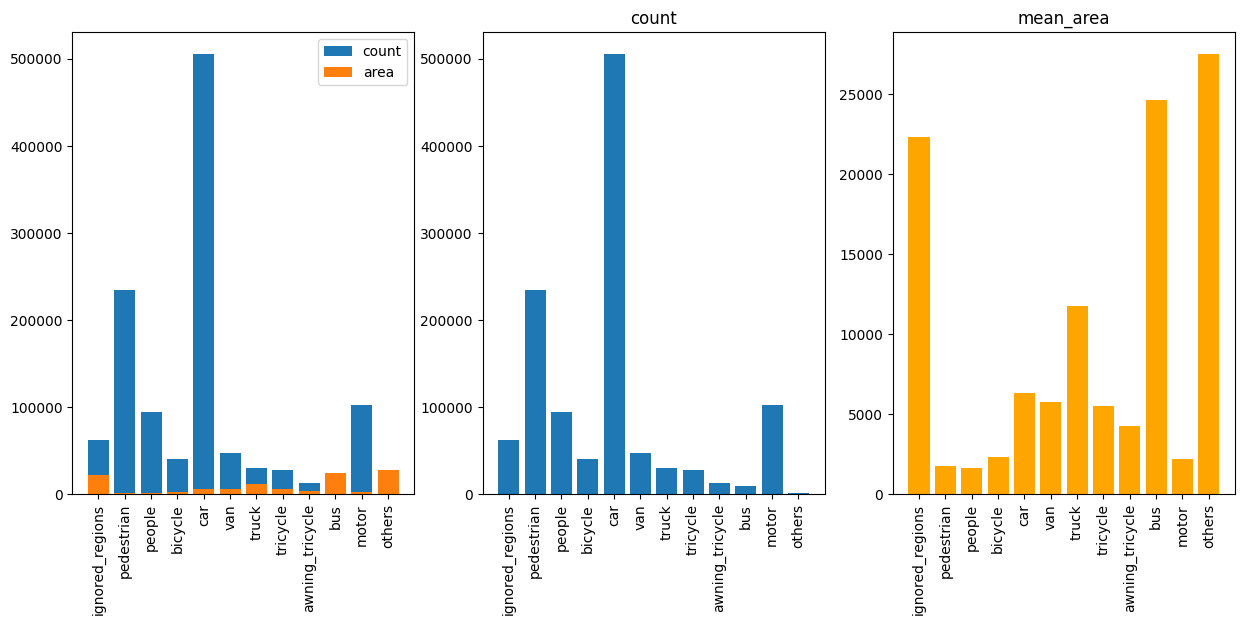

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
# 카테고리별 분포, 면적 분포 평균 겹쳐서
plt.subplot(1,3,1)
plt.bar(['ignored_regions', 'pedestrian', 'people', 'bicycle', 'car', 'van',
       'truck', 'tricycle', 'awning_tricycle', 'bus', 'motor', 'others'], train.groupby('category_id').name.count())
plt.xticks(rotation='vertical')

plt.subplot(1,3,1)
plt.bar(['ignored_regions', 'pedestrian', 'people', 'bicycle', 'car', 'van',
       'truck', 'tricycle', 'awning_tricycle', 'bus', 'motor', 'others'], train.groupby('category_id').area.mean())
plt.xticks(rotation='vertical')

plt.legend(['count','area'])


# 카테고리별 분포
plt.subplot(1,3,2)
plt.title('count')
plt.bar(['ignored_regions', 'pedestrian', 'people', 'bicycle', 'car', 'van',
       'truck', 'tricycle', 'awning_tricycle', 'bus', 'motor', 'others'], train.groupby('category_id').name.count())
plt.xticks(rotation='vertical')

# 카테고리 별 면적 분포 평균
plt.subplot(1,3,3)
plt.title('mean_area')
plt.bar(['ignored_regions', 'pedestrian', 'people', 'bicycle', 'car', 'van',
       'truck', 'tricycle', 'awning_tricycle', 'bus', 'motor', 'others'], train.groupby('category_id').area.mean(),color='orange')
plt.xticks(rotation='vertical')

In [ ]:
train.groupby('name').name.count().sort_values(),train.groupby('name').area.mean().sort_values()

(name
 others               1474
 bus                  9653
 awning_tricycle     13011
 tricycle            28338
 truck               30498
 bicycle             40255
 van                 46940
 ignored_regions     62369
 people              94396
 motor              102819
 pedestrian         234305
 car                505301
 Name: name, dtype: int64,
 name
 people              1631.528741
 pedestrian          1772.774593
 motor               2207.921055
 bicycle             2314.074103
 awning_tricycle     4235.490892
 tricycle            5487.069906
 van                 5761.543907
 car                 6320.702219
 truck              11738.692504
 ignored_regions    22341.419856
 bus                24643.737802
 others             27490.584125
 Name: area, dtype: float64)

(ignore, others 제외)  
car 가장많음, bus 가장적음  
bus 가장 넓음, people 가장 좁음  
car 갯수에 비해 면적이 좁음, bus 개수에 비해 면적이 넓음

In [ ]:
(train[train['truncation'] == 1].groupby('name').name.count()/train.groupby('name').name.count()).sort_values(ascending=False) # 잘린 카테고리 비율

name
others             0.144505
bus                0.137677
truck              0.112007
car                0.057047
tricycle           0.046334
awning_tricycle    0.045654
van                0.041542
motor              0.031492
people             0.020817
pedestrian         0.019086
bicycle            0.008446
ignored_regions         NaN
Name: name, dtype: float64

면적이 큰 bus나 truck에 많이 잘림

In [ ]:
(train[train['occlusion'] != 0].groupby('name').name.count()/train.groupby('name').name.count()).sort_values(ascending=False) # 가려진 카테고리들 비율

name
people             0.762850
truck              0.646928
awning_tricycle    0.630313
tricycle           0.573329
bicycle            0.535213
motor              0.452835
bus                0.440692
car                0.429898
van                0.428632
pedestrian         0.336450
others             0.272049
ignored_regions         NaN
Name: name, dtype: float64

people, 사이클, 바이크, motor 사람이 타고있는것들, truck이 가려진 정도가 높음

In [ ]:
(train[train['occlusion'] == 1].groupby('name').name.count()/train.groupby('name').name.count()).sort_values(ascending=False),\
    (train[train['occlusion'] == 2].groupby('name').name.count()/train.groupby('name').name.count()).sort_values(ascending=False)

(name
 people             0.688588
 awning_tricycle    0.616017
 tricycle           0.548980
 bicycle            0.501304
 truck              0.488688
 bus                0.419766
 van                0.403728
 motor              0.390045
 car                0.383751
 pedestrian         0.277954
 others             0.272049
 ignored_regions         NaN
 Name: name, dtype: float64,
 name
 truck              0.158240
 people             0.074262
 motor              0.062790
 pedestrian         0.058496
 car                0.046147
 bicycle            0.033909
 van                0.024904
 tricycle           0.024349
 bus                0.020926
 awning_tricycle    0.014296
 ignored_regions         NaN
 others                  NaN
 Name: name, dtype: float64)

truck자체가 가려짐이 심함, 사람이 타고있는 것들은 occlusion 1

# Val

In [ ]:
val

,category_id,name,bbox,area,mot_conf,truncation,occlusion,file_name,video_id,frame_id,height,width,img_size,vid_name
0,1,pedestrian,"[1649.0, 598.0, 39.0, 93.0]",3627.0,1.0,0,1,VisDrone2019-MOT-val/sequences/uav0000117_0262...,57,0,1530,2720,4161600,uav0000117_02622_v
1,1,pedestrian,"[1631.0, 607.0, 33.0, 84.0]",2772.0,1.0,0,1,VisDrone2019-MOT-val/sequences/uav0000117_0262...,57,0,1530,2720,4161600,uav0000117_02622_v
2,1,pedestrian,"[1658.0, 625.0, 60.0, 93.0]",5580.0,1.0,0,1,VisDrone2019-MOT-val/sequences/uav0000117_0262...,57,0,1530,2720,4161600,uav0000117_02622_v
3,1,pedestrian,"[1589.0, 595.0, 53.0, 80.0]",4240.0,1.0,0,1,VisDrone2019-MOT-val/sequences/uav0000117_0262...,57,0,1530,2720,4161600,uav0000117_02622_v
4,4,car,"[443.0, 754.0, 147.0, 156.0]",22932.0,1.0,0,0,VisDrone2019-MOT-val/sequences/uav0000117_0262...,57,0,1530,2720,4161600,uav0000117_02622_v
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118122,1,pedestrian,"[98.0, 95.0, 17.0, 35.0]",595.0,1.0,0,0,VisDrone2019-MOT-val/sequences/uav0000086_0000...,63,463,756,1344,1016064,uav0000086_00000_v
118123,1,pedestrian,"[94.0, 92.0, 15.0, 35.0]",525.0,1.0,0,2,VisDrone2019-MOT-val/sequences/uav0000086_0000...,63,463,756,1344,1016064,uav0000086_00000_v
118124,1,pedestrian,"[93.0, 79.0, 17.0, 45.0]",765.0,1.0,0,2,VisDrone2019-MOT-val/sequences/uav0000086_0000...,63,463,756,1344,1016064,uav0000086_00000_v
118125,2,people,"[65.0, 107.0, 19.0, 31.0]",589.0,1.0,0,0,VisDrone2019-MOT-val/sequences/uav0000086_0000...,63,463,756,1344,1016064,uav0000086_00000_v


In [ ]:
val['video_id'].nunique() # 폴더 갯수(비디오 갯수)

7

In [ ]:
val['file_name'].nunique() # 이미지 개수

2846

In [ ]:
val[['area','height','width','img_size']].describe()

,area,height,width,img_size
count,118127.000000,118127.000000,118127.000000,1.181270e+05
mean,6892.703065,1246.014942,2215.137674,3.141014e+06
std,17717.570852,462.891967,822.919052,2.282170e+06
min,96.000000,756.000000,1344.000000,1.016064e+06
25%,1288.000000,756.000000,1344.000000,1.016064e+06
50%,2862.000000,1071.000000,1904.000000,2.039184e+06
75%,5460.000000,1530.000000,2720.000000,4.161600e+06
max,286125.000000,2160.000000,3840.000000,8.294400e+06


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'ignored_regions'),
  Text(1, 0, 'pedestrian'),
  Text(2, 0, 'people'),
  Text(3, 0, 'bicycle'),
  Text(4, 0, 'car'),
  Text(5, 0, 'van'),
  Text(6, 0, 'truck'),
  Text(7, 0, 'tricycle'),
  Text(8, 0, 'awning_tricycle'),
  Text(9, 0, 'bus'),
  Text(10, 0, 'motor'),
  Text(11, 0, 'others')])

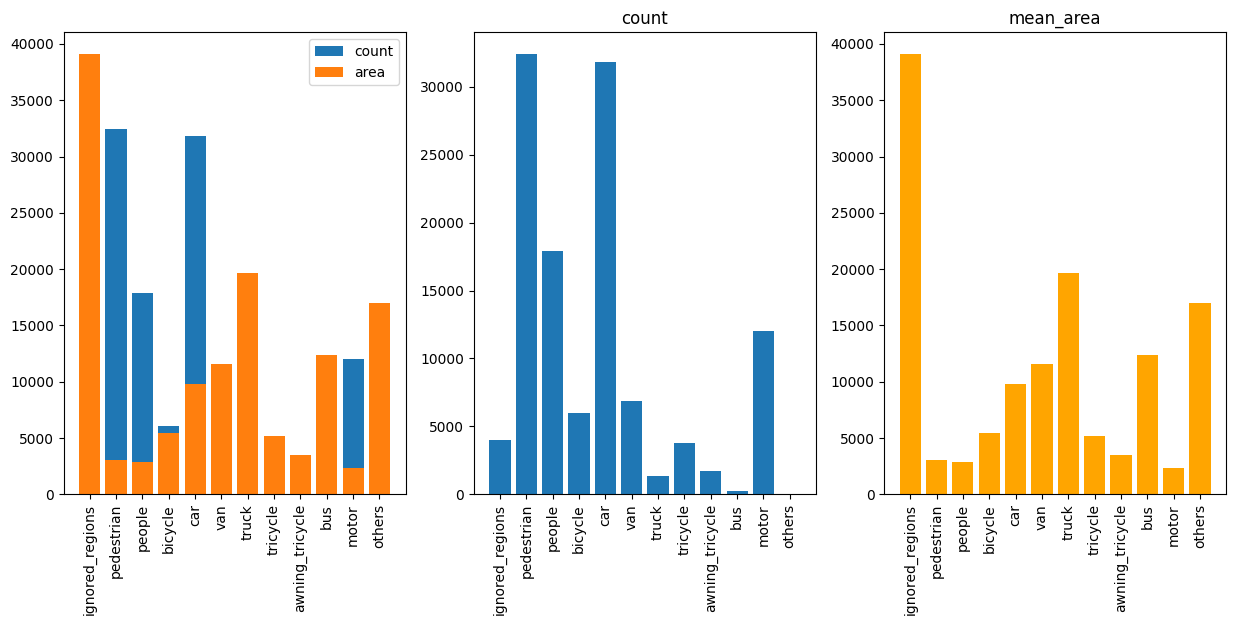

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
# 카테고리별 분포, 면적 분포 평균 겹쳐서
plt.subplot(1,3,1)
plt.bar(['ignored_regions', 'pedestrian', 'people', 'bicycle', 'car', 'van',
       'truck', 'tricycle', 'awning_tricycle', 'bus', 'motor', 'others'], val.groupby('category_id').name.count())
plt.xticks(rotation='vertical')

plt.subplot(1,3,1)
plt.bar(['ignored_regions', 'pedestrian', 'people', 'bicycle', 'car', 'van',
       'truck', 'tricycle', 'awning_tricycle', 'bus', 'motor', 'others'], val.groupby('category_id').area.mean())
plt.xticks(rotation='vertical')

plt.legend(['count','area'])


# 카테고리별 분포
plt.subplot(1,3,2)
plt.title('count')
plt.bar(['ignored_regions', 'pedestrian', 'people', 'bicycle', 'car', 'van',
       'truck', 'tricycle', 'awning_tricycle', 'bus', 'motor', 'others'], val.groupby('category_id').name.count())
plt.xticks(rotation='vertical')

# 카테고리 별 면적 분포 평균
plt.subplot(1,3,3)
plt.title('mean_area')
plt.bar(['ignored_regions', 'pedestrian', 'people', 'bicycle', 'car', 'van',
       'truck', 'tricycle', 'awning_tricycle', 'bus', 'motor', 'others'], val.groupby('category_id').area.mean(),color='orange')
plt.xticks(rotation='vertical')

In [ ]:
val.groupby('name').name.count().sort_values(),val.groupby('name').area.mean().sort_values()

(name
 others                 1
 bus                  264
 truck               1359
 awning_tricycle     1718
 tricycle            3769
 ignored_regions     3994
 bicycle             6022
 van                 6842
 motor              12025
 people             17908
 car                31821
 pedestrian         32404
 Name: name, dtype: int64,
 name
 motor               2367.436424
 people              2833.343701
 pedestrian          3022.021047
 awning_tricycle     3510.843423
 tricycle            5202.536747
 bicycle             5475.043175
 car                 9835.606361
 van                11610.193072
 bus                12338.946970
 others             16960.000000
 truck              19638.747609
 ignored_regions    39081.335003
 Name: area, dtype: float64)

In [ ]:
(val[val['truncation'] == 1].groupby('name').name.count()/val.groupby('name').name.count()).sort_values(ascending=False) # 잘린 카테고리 비율

name
van                0.163110
truck              0.139809
bus                0.109848
car                0.070080
people             0.050201
motor              0.041331
pedestrian         0.028021
bicycle            0.021588
awning_tricycle    0.019790
tricycle           0.012470
ignored_regions         NaN
others                  NaN
Name: name, dtype: float64

In [ ]:
(val[val['occlusion'] != 0].groupby('name').name.count()/val.groupby('name').name.count()).sort_values(ascending=False) # 가려진 카테고리들 비율

name
bicycle            0.904351
truck              0.818985
people             0.741847
motor              0.723077
van                0.601725
car                0.563402
tricycle           0.519236
awning_tricycle    0.515716
pedestrian         0.429885
bus                0.178030
ignored_regions         NaN
others                  NaN
Name: name, dtype: float64

In [ ]:
(val[val['occlusion'] == 1].groupby('name').name.count()/val.groupby('name').name.count()).sort_values(ascending=False),\
    (val[val['occlusion'] == 2].groupby('name').name.count()/val.groupby('name').name.count()).sort_values(ascending=False)

(name
 bicycle            0.885752
 truck              0.710081
 people             0.695443
 motor              0.645239
 van                0.495469
 tricycle           0.484213
 car                0.470538
 awning_tricycle    0.384168
 pedestrian         0.383132
 bus                0.178030
 ignored_regions         NaN
 others                  NaN
 Name: name, dtype: float64,
 name
 awning_tricycle    0.131548
 truck              0.108904
 van                0.106255
 car                0.092863
 motor              0.077838
 pedestrian         0.046753
 people             0.046404
 tricycle           0.035023
 bicycle            0.018598
 bus                     NaN
 ignored_regions         NaN
 others                  NaN
 Name: name, dtype: float64)

# Test

In [ ]:
test

,category_id,name,bbox,area,mot_conf,truncation,occlusion,file_name,video_id,frame_id,height,width,img_size,vid_name
0,4,car,"[493.0, 329.0, 83.0, 68.0]",5644.0,1.0,0,1,VisDrone2019-MOT-test-dev/sequences/uav0000297...,64,0,1071,1904,2039184,uav0000297_02761_v
1,1,pedestrian,"[1759.0, 708.0, 37.0, 97.0]",3589.0,1.0,0,0,VisDrone2019-MOT-test-dev/sequences/uav0000297...,64,0,1071,1904,2039184,uav0000297_02761_v
2,4,car,"[692.0, 142.0, 45.0, 40.0]",1800.0,1.0,0,1,VisDrone2019-MOT-test-dev/sequences/uav0000297...,64,0,1071,1904,2039184,uav0000297_02761_v
3,4,car,"[737.0, 148.0, 43.0, 39.0]",1677.0,1.0,0,1,VisDrone2019-MOT-test-dev/sequences/uav0000297...,64,0,1071,1904,2039184,uav0000297_02761_v
4,4,car,"[788.0, 154.0, 39.0, 39.0]",1521.0,1.0,0,1,VisDrone2019-MOT-test-dev/sequences/uav0000297...,64,0,1071,1904,2039184,uav0000297_02761_v
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333695,1,pedestrian,"[1205.0, 583.0, 29.0, 65.0]",1885.0,1.0,0,2,VisDrone2019-MOT-test-dev/sequences/uav0000297...,80,145,1071,1904,2039184,uav0000297_00000_v
333696,1,pedestrian,"[1187.0, 568.0, 32.0, 54.0]",1728.0,1.0,0,1,VisDrone2019-MOT-test-dev/sequences/uav0000297...,80,145,1071,1904,2039184,uav0000297_00000_v
333697,1,pedestrian,"[1206.0, 541.0, 26.0, 56.0]",1456.0,1.0,0,1,VisDrone2019-MOT-test-dev/sequences/uav0000297...,80,145,1071,1904,2039184,uav0000297_00000_v
333698,1,pedestrian,"[1211.0, 529.0, 29.0, 53.0]",1537.0,1.0,0,0,VisDrone2019-MOT-test-dev/sequences/uav0000297...,80,145,1071,1904,2039184,uav0000297_00000_v


In [ ]:
test['video_id'].nunique() # 폴더 갯수(비디오 갯수)

17

In [ ]:
test['file_name'].nunique() # 이미지 개수

6635

In [ ]:
test[['area','height','width','img_size']].describe()

,area,height,width,img_size
count,333700.000000,333700.000000,333700.000000,3.337000e+05
mean,3549.629272,792.165975,1408.337980,1.210058e+06
std,7946.082472,230.481668,409.668857,6.840989e+05
min,54.000000,382.000000,680.000000,2.597600e+05
25%,504.000000,540.000000,960.000000,5.184000e+05
50%,1221.000000,765.000000,1360.000000,1.040400e+06
75%,3440.000000,1071.000000,1904.000000,2.039184e+06
max,175357.000000,1530.000000,2720.000000,4.161600e+06


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'ignored_regions'),
  Text(1, 0, 'pedestrian'),
  Text(2, 0, 'people'),
  Text(3, 0, 'bicycle'),
  Text(4, 0, 'car'),
  Text(5, 0, 'van'),
  Text(6, 0, 'truck'),
  Text(7, 0, 'tricycle'),
  Text(8, 0, 'awning_tricycle'),
  Text(9, 0, 'bus'),
  Text(10, 0, 'motor'),
  Text(11, 0, 'others')])

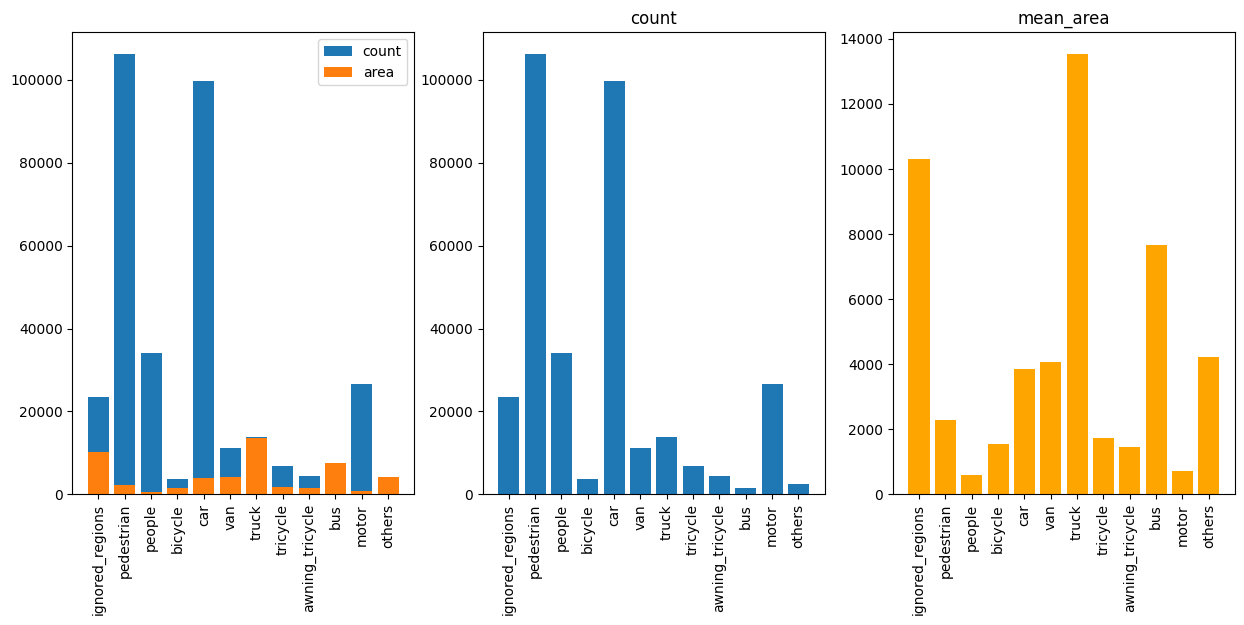

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
# 카테고리별 분포, 면적 분포 평균 겹쳐서
plt.subplot(1,3,1)
plt.bar(['ignored_regions', 'pedestrian', 'people', 'bicycle', 'car', 'van',
       'truck', 'tricycle', 'awning_tricycle', 'bus', 'motor', 'others'], test.groupby('category_id').name.count())
plt.xticks(rotation='vertical')

plt.subplot(1,3,1)
plt.bar(['ignored_regions', 'pedestrian', 'people', 'bicycle', 'car', 'van',
       'truck', 'tricycle', 'awning_tricycle', 'bus', 'motor', 'others'], test.groupby('category_id').area.mean())
plt.xticks(rotation='vertical')

plt.legend(['count','area'])


# 카테고리별 분포
plt.subplot(1,3,2)
plt.title('count')
plt.bar(['ignored_regions', 'pedestrian', 'people', 'bicycle', 'car', 'van',
       'truck', 'tricycle', 'awning_tricycle', 'bus', 'motor', 'others'], test.groupby('category_id').name.count())
plt.xticks(rotation='vertical')

# 카테고리 별 면적 분포 평균
plt.subplot(1,3,3)
plt.title('mean_area')
plt.bar(['ignored_regions', 'pedestrian', 'people', 'bicycle', 'car', 'van',
       'truck', 'tricycle', 'awning_tricycle', 'bus', 'motor', 'others'], test.groupby('category_id').area.mean(),color='orange')
plt.xticks(rotation='vertical')

In [ ]:
test.groupby('name').name.count().sort_values(),test.groupby('name').area.mean().sort_values()

(name
 bus                  1536
 others               2429
 bicycle              3637
 awning_tricycle      4354
 tricycle             6721
 van                 11223
 truck               13708
 ignored_regions     23472
 motor               26710
 people              33999
 car                 99727
 pedestrian         106184
 Name: name, dtype: int64,
 name
 people               585.127886
 motor                702.203295
 awning_tricycle     1451.444878
 bicycle             1543.990927
 tricycle            1724.445469
 pedestrian          2290.662247
 car                 3854.802952
 van                 4064.130536
 others              4208.616715
 bus                 7651.533203
 ignored_regions    10296.572299
 truck              13525.577035
 Name: area, dtype: float64)

In [ ]:
(test[test['truncation'] == 1].groupby('name').name.count()/test.groupby('name').name.count()).sort_values(ascending=False) # 잘린 카테고리 비율

name
truck              0.214546
tricycle           0.059069
van                0.047314
car                0.046196
pedestrian         0.041635
others             0.037464
bicycle            0.024196
bus                0.016276
motor              0.010296
people             0.007971
awning_tricycle    0.004593
ignored_regions         NaN
Name: name, dtype: float64

In [ ]:
(test[test['occlusion'] != 0].groupby('name').name.count()/test.groupby('name').name.count()).sort_values(ascending=False) # 가려진 카테고리들 비율

name
others             0.813503
people             0.760640
bicycle            0.715975
van                0.630580
motor              0.581018
truck              0.563977
awning_tricycle    0.543638
tricycle           0.515548
car                0.486739
pedestrian         0.439727
bus                0.396484
ignored_regions         NaN
Name: name, dtype: float64

In [ ]:
(test[test['occlusion'] == 1].groupby('name').name.count()/test.groupby('name').name.count()).sort_values(ascending=False),\
    (test[test['occlusion'] == 2].groupby('name').name.count()/test.groupby('name').name.count()).sort_values(ascending=False)

(name
 others             0.620832
 people             0.563252
 bicycle            0.541655
 awning_tricycle    0.520441
 van                0.519291
 truck              0.447841
 car                0.437795
 motor              0.434145
 tricycle           0.428508
 pedestrian         0.350825
 bus                0.264974
 ignored_regions         NaN
 Name: name, dtype: float64,
 name
 people             0.197388
 others             0.192672
 bicycle            0.174319
 motor              0.146874
 bus                0.131510
 truck              0.116137
 van                0.111289
 pedestrian         0.088902
 tricycle           0.087041
 car                0.048944
 awning_tricycle    0.023197
 ignored_regions         NaN
 Name: name, dtype: float64)

# Video 별: Train

In [ ]:
vid_cat = pd.DataFrame(train.pivot_table(index=['vid_name','name'], aggfunc='count').iloc[:,0].reset_index().rename(columns={'area':'count'})).pivot_table(index='vid_name', columns='name', values='count', fill_value=0)

In [ ]:
vid_cat

name,awning_tricycle,bicycle,bus,car,ignored_regions,motor,others,pedestrian,people,tricycle,truck,van
vid_name,,,,,,,,,,,,
uav0000013_00000_v,101,125,0,0,827,1668,0,4061,1715,117,0,0
uav0000013_01073_v,0,0,0,0,58,178,34,536,315,0,0,0
uav0000013_01392_v,118,0,0,0,159,739,0,1301,598,54,0,0
uav0000020_00406_v,368,311,0,0,823,1255,0,6381,1044,0,0,0
uav0000071_03240_v,0,255,0,1829,628,551,0,1225,1384,115,0,63
uav0000072_04488_v,85,54,0,416,0,238,0,4921,3285,196,102,85
uav0000072_05448_v,0,53,0,1108,142,981,0,5762,1493,462,185,304
uav0000072_06432_v,0,0,0,764,320,192,0,5870,1010,656,39,194
uav0000076_00720_v,0,0,0,1872,0,362,0,2455,257,718,1402,48


In [ ]:
cat_count = vid_cat[['pedestrian', 'bicycle', 'car', 'bus', 'motor', 'van', 'people', 'truck', 'tricycle', 'awning_tricycle']]

In [ ]:
cat_count.sort_values(['pedestrian'], ascending=False).head()

name,pedestrian,bicycle,car,bus,motor,van,people,truck,tricycle,awning_tricycle
vid_name,,,,,,,,,,
uav0000084_00000_v,21292,806,0,0,59,0,5750,0,0,0
uav0000288_00001_v,19118,9152,16018,0,9945,1669,6916,147,1746,205
uav0000357_00920_v,15950,3693,14551,212,16184,730,9751,521,1905,0
uav0000099_02109_v,8910,0,0,0,0,0,45,0,0,0
uav0000079_00480_v,8563,383,0,0,1316,0,2002,20,63,0


In [ ]:
cat_count.sort_values(['truck'], ascending=False).head()

name,pedestrian,bicycle,car,bus,motor,van,people,truck,tricycle,awning_tricycle
vid_name,,,,,,,,,,
uav0000273_00001_v,1672,0,13969,261,0,1713,394,7514,0,0
uav0000264_02760_v,157,0,7161,224,110,825,370,2658,244,0
uav0000244_01440_v,4813,621,22292,1380,1853,2704,1049,2343,3418,455
uav0000248_00001_v,1945,0,14751,677,3251,7602,0,1969,77,1882
uav0000263_03289_v,0,141,1519,757,226,383,0,1660,0,0


In [ ]:
cat_count.sort_values(['van'], ascending=False).head()

name,pedestrian,bicycle,car,bus,motor,van,people,truck,tricycle,awning_tricycle
vid_name,,,,,,,,,,
uav0000248_00001_v,1945,0,14751,677,3251,7602,0,1969,77,1882
uav0000361_02323_v,2557,184,7388,219,2362,3485,1063,438,1095,0
uav0000323_01173_v,1799,322,12647,210,701,2899,960,327,0,0
uav0000244_01440_v,4813,621,22292,1380,1853,2704,1049,2343,3418,455
uav0000278_00001_v,8457,592,28050,192,3305,2582,2449,1575,2691,3026


In [ ]:
cat_count.sum(axis=1).sort_values(ascending=False).head()

vid_name
uav0000288_00001_v    64916
uav0000357_00920_v    63497
uav0000126_00001_v    54474
uav0000278_00001_v    52919
uav0000279_00001_v    52155
dtype: int64

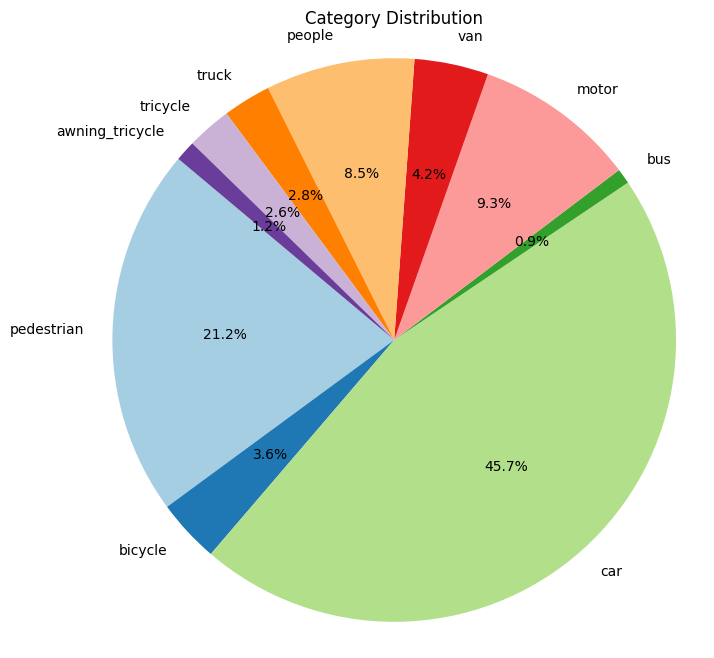

In [ ]:
# 파이 차트 생성
plt.figure(figsize=(8, 8))

# 한 개의 파이 차트에 모든 카테고리의 비율을 표시
total_counts = cat_count.sum()
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')  # 원을 원형으로 유지

plt.title('Category Distribution')
plt.show()

<Figure size 5000x5000 with 0 Axes>

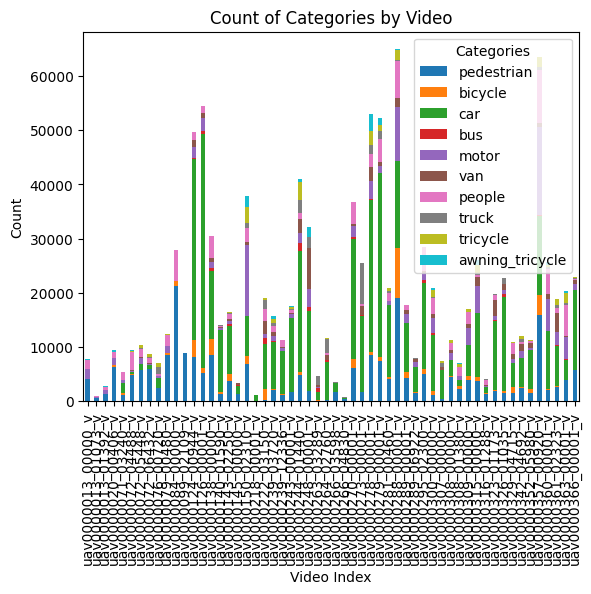

In [ ]:
# 막대 그래프
plt.figure(figsize=(50, 50))
cat_count.plot(kind='bar', stacked=True)
plt.title('Count of Categories by Video')
plt.xlabel('Video Index')
plt.ylabel('Count')
plt.legend(title='Categories')
plt.show()

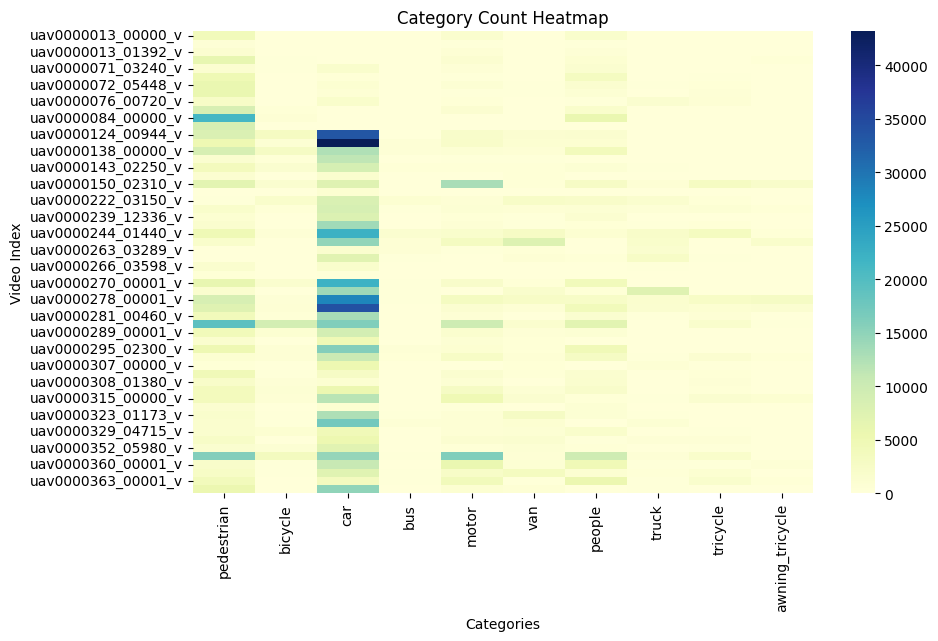

In [ ]:
import seaborn as sns
# 히트맵
plt.figure(figsize=(10, 6))
sns.heatmap(cat_count, cmap='YlGnBu')
plt.title('Category Count Heatmap')
plt.xlabel('Categories')
plt.ylabel('Video Index')
plt.show()

# Video 별: val

In [ ]:
vid_cat = pd.DataFrame(val.pivot_table(index=['vid_name','name'], aggfunc='count').iloc[:,0].reset_index().rename(columns={'area':'count'})).pivot_table(index='vid_name', columns='name', values='count', fill_value=0)

In [ ]:
vid_cat

name,awning_tricycle,bicycle,bus,car,ignored_regions,motor,others,pedestrian,people,tricycle,truck,van
vid_name,,,,,,,,,,,,
uav0000086_00000_v,0,312,0,0,780,687,0,14899,7199,0,0,0
uav0000117_02622_v,49,49,0,4126,1184,778,0,8164,1506,1228,456,923
uav0000137_00458_v,0,4759,0,6574,273,2970,0,3792,5507,0,0,486
uav0000182_00000_v,1047,142,0,5848,769,5882,1,845,330,1248,359,1970
uav0000268_05773_v,0,0,0,8688,0,0,0,891,1093,510,330,2066
uav0000305_00000_v,0,0,264,3618,0,1066,0,540,63,222,77,541
uav0000339_00001_v,622,760,0,2967,988,642,0,3273,2210,561,137,856


In [ ]:
cat_count = vid_cat[['pedestrian', 'bicycle', 'car', 'bus', 'motor', 'van', 'people', 'truck', 'tricycle', 'awning_tricycle']]

In [ ]:
cat_count.sort_values(['pedestrian'], ascending=False).head()

name,pedestrian,bicycle,car,bus,motor,van,people,truck,tricycle,awning_tricycle
vid_name,,,,,,,,,,
uav0000086_00000_v,14899,312,0,0,687,0,7199,0,0,0
uav0000117_02622_v,8164,49,4126,0,778,923,1506,456,1228,49
uav0000137_00458_v,3792,4759,6574,0,2970,486,5507,0,0,0
uav0000339_00001_v,3273,760,2967,0,642,856,2210,137,561,622
uav0000268_05773_v,891,0,8688,0,0,2066,1093,330,510,0


In [ ]:
cat_count.sort_values(['truck'], ascending=False).head()

name,pedestrian,bicycle,car,bus,motor,van,people,truck,tricycle,awning_tricycle
vid_name,,,,,,,,,,
uav0000117_02622_v,8164,49,4126,0,778,923,1506,456,1228,49
uav0000182_00000_v,845,142,5848,0,5882,1970,330,359,1248,1047
uav0000268_05773_v,891,0,8688,0,0,2066,1093,330,510,0
uav0000339_00001_v,3273,760,2967,0,642,856,2210,137,561,622
uav0000305_00000_v,540,0,3618,264,1066,541,63,77,222,0


In [ ]:
cat_count.sort_values(['van'], ascending=False).head()

name,pedestrian,bicycle,car,bus,motor,van,people,truck,tricycle,awning_tricycle
vid_name,,,,,,,,,,
uav0000268_05773_v,891,0,8688,0,0,2066,1093,330,510,0
uav0000182_00000_v,845,142,5848,0,5882,1970,330,359,1248,1047
uav0000117_02622_v,8164,49,4126,0,778,923,1506,456,1228,49
uav0000339_00001_v,3273,760,2967,0,642,856,2210,137,561,622
uav0000305_00000_v,540,0,3618,264,1066,541,63,77,222,0


In [ ]:
cat_count.sum(axis=1).sort_values(ascending=False).head()

vid_name
uav0000137_00458_v    24088
uav0000086_00000_v    23097
uav0000182_00000_v    17671
uav0000117_02622_v    17279
uav0000268_05773_v    13578
dtype: int64

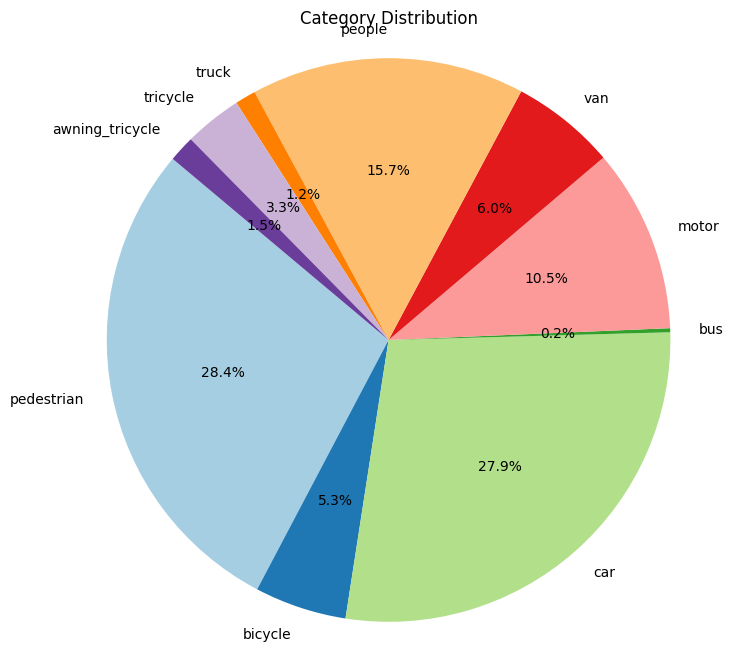

In [ ]:
# 파이 차트 생성
plt.figure(figsize=(8, 8))

# 한 개의 파이 차트에 모든 카테고리의 비율을 표시
total_counts = cat_count.sum()
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')  # 원을 원형으로 유지

plt.title('Category Distribution')
plt.show()

<Figure size 5000x5000 with 0 Axes>

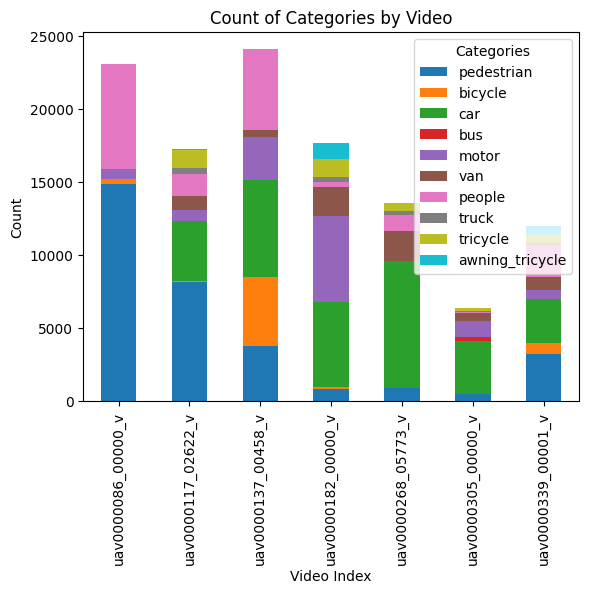

In [ ]:
# 막대 그래프
plt.figure(figsize=(50, 50))
cat_count.plot(kind='bar', stacked=True)
plt.title('Count of Categories by Video')
plt.xlabel('Video Index')
plt.ylabel('Count')
plt.legend(title='Categories')
plt.show()

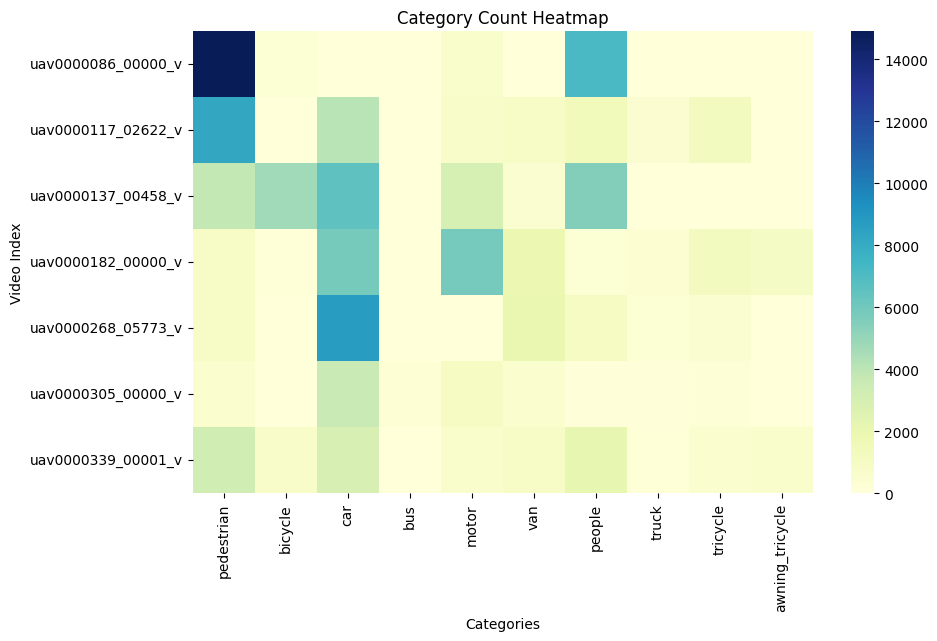

In [ ]:
import seaborn as sns
# 히트맵
plt.figure(figsize=(10, 6))
sns.heatmap(cat_count, cmap='YlGnBu')
plt.title('Category Count Heatmap')
plt.xlabel('Categories')
plt.ylabel('Video Index')
plt.show()

# Video 별: test

In [ ]:
vid_cat = pd.DataFrame(test.pivot_table(index=['vid_name','name'], aggfunc='count').iloc[:,0].reset_index().rename(columns={'area':'count'})).pivot_table(index='vid_name', columns='name', values='count', fill_value=0)

In [ ]:
vid_cat

name,awning_tricycle,bicycle,bus,car,ignored_regions,motor,others,pedestrian,people,tricycle,truck,van
vid_name,,,,,,,,,,,,
uav0000009_03358_v,0,0,0,8201,209,106,0,3933,216,0,0,75
uav0000073_00600_v,0,171,0,0,409,0,0,13945,183,0,0,13
uav0000073_04464_v,0,74,0,67,324,45,0,33803,355,0,0,0
uav0000077_00720_v,0,274,0,8068,0,213,0,1068,1888,267,6017,1449
uav0000088_00290_v,0,230,0,0,2387,0,0,14877,6821,0,0,0
uav0000119_02301_v,0,0,0,3144,1293,651,0,715,699,0,0,706
uav0000120_04775_v,0,1223,83,16234,3216,4148,0,14637,4307,540,923,570
uav0000161_00000_v,2100,410,0,6348,3660,6457,0,2465,11954,1773,0,184
uav0000188_00000_v,0,260,0,5885,1800,5845,0,1550,3796,1472,291,112


In [ ]:
cat_count = vid_cat[['pedestrian', 'bicycle', 'car', 'bus', 'motor', 'van', 'people', 'truck', 'tricycle', 'awning_tricycle']]

In [ ]:
cat_count.sort_values(['pedestrian'], ascending=False).head()

name,pedestrian,bicycle,car,bus,motor,van,people,truck,tricycle,awning_tricycle
vid_name,,,,,,,,,,
uav0000073_04464_v,33803,74,67,0,45,0,355,0,0,0
uav0000088_00290_v,14877,230,0,0,0,0,6821,0,0,0
uav0000120_04775_v,14637,1223,16234,83,4148,570,4307,923,540,0
uav0000073_00600_v,13945,171,0,0,0,13,183,0,0,0
uav0000297_02761_v,9801,469,17180,737,232,629,324,0,0,0


In [ ]:
cat_count.sort_values(['truck'], ascending=False).head()

name,pedestrian,bicycle,car,bus,motor,van,people,truck,tricycle,awning_tricycle
vid_name,,,,,,,,,,
uav0000077_00720_v,1068,274,8068,0,213,1449,1888,6017,267,0
uav0000201_00000_v,1335,253,6147,0,3992,2902,684,3042,1437,686
uav0000355_00001_v,834,4,5544,171,270,3031,1065,1665,648,1006
uav0000370_00001_v,0,0,1004,0,0,189,0,1282,0,0
uav0000120_04775_v,14637,1223,16234,83,4148,570,4307,923,540,0


In [ ]:
cat_count.sort_values(['van'], ascending=False).head()

name,pedestrian,bicycle,car,bus,motor,van,people,truck,tricycle,awning_tricycle
vid_name,,,,,,,,,,
uav0000355_00001_v,834,4,5544,171,270,3031,1065,1665,648,1006
uav0000201_00000_v,1335,253,6147,0,3992,2902,684,3042,1437,686
uav0000077_00720_v,1068,274,8068,0,213,1449,1888,6017,267,0
uav0000119_02301_v,715,0,3144,0,651,706,699,0,0,0
uav0000297_02761_v,9801,469,17180,737,232,629,324,0,0,0


In [ ]:
cat_count.sum(axis=1).sort_values(ascending=False).head()

vid_name
uav0000120_04775_v    42665
uav0000073_04464_v    34344
uav0000161_00000_v    31691
uav0000297_02761_v    29372
uav0000088_00290_v    21928
dtype: int64

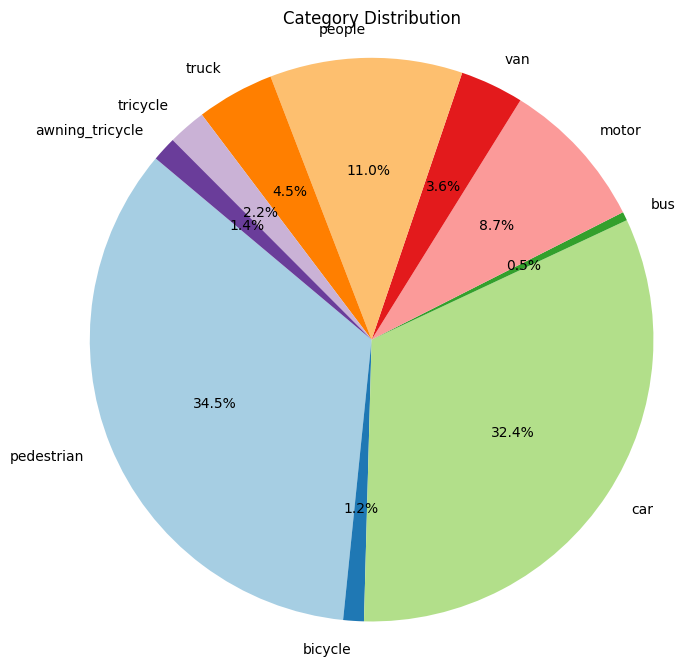

In [ ]:
# 파이 차트 생성
plt.figure(figsize=(8, 8))

# 한 개의 파이 차트에 모든 카테고리의 비율을 표시
total_counts = cat_count.sum()
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.axis('equal')  # 원을 원형으로 유지

plt.title('Category Distribution')
plt.show()

<Figure size 5000x5000 with 0 Axes>

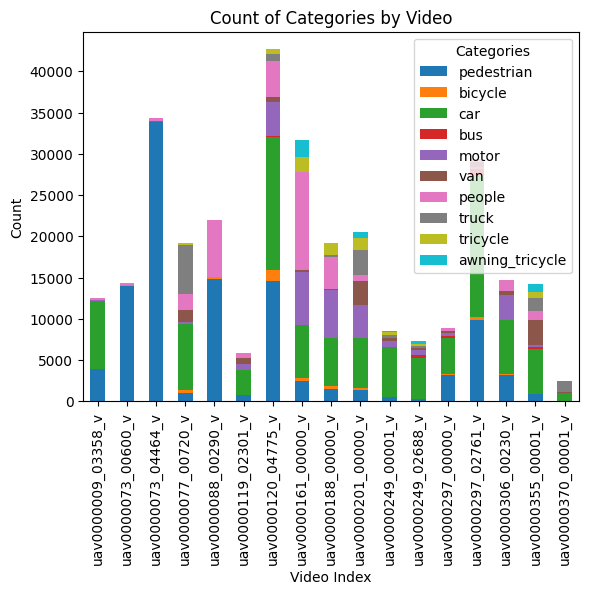

In [ ]:
# 막대 그래프
plt.figure(figsize=(50, 50))
cat_count.plot(kind='bar', stacked=True)
plt.title('Count of Categories by Video')
plt.xlabel('Video Index')
plt.ylabel('Count')
plt.legend(title='Categories')
plt.show()

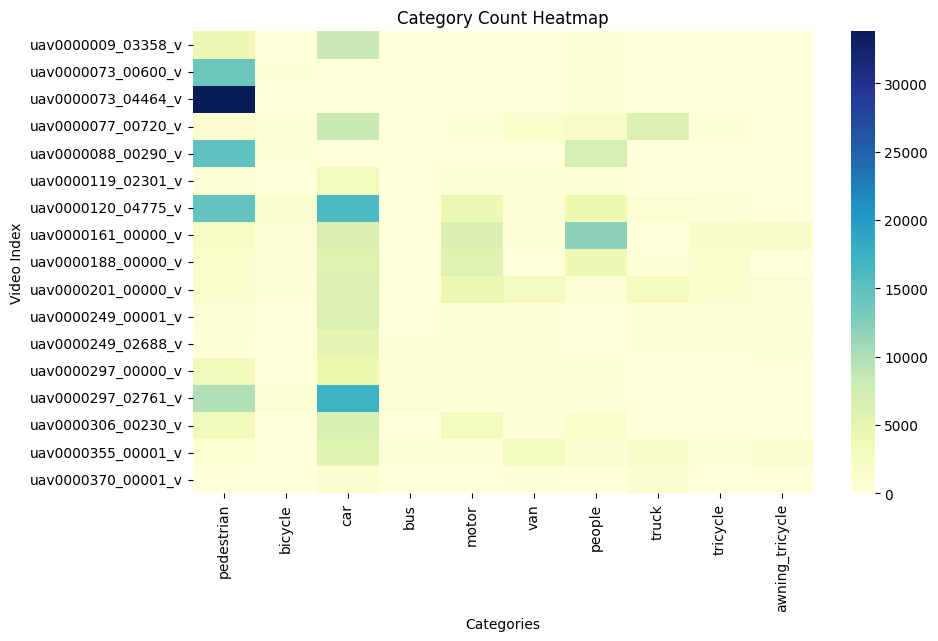

In [ ]:
import seaborn as sns
# 히트맵
plt.figure(figsize=(10, 6))
sns.heatmap(cat_count, cmap='YlGnBu')
plt.title('Category Count Heatmap')
plt.xlabel('Categories')
plt.ylabel('Video Index')
plt.show()

# HOTA

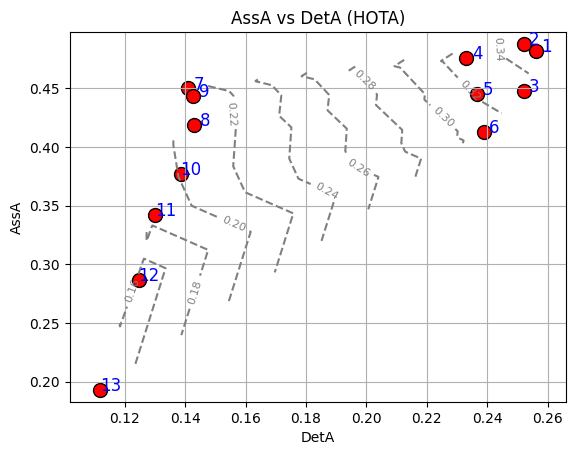

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 최종 정리한 데이터
data = pd.read_csv('./data/result.CSV', index_col='Unnamed: 0')
data = data.sort_values('HOTA', ascending=False)
x = data['DetA']
y = data['AssA']
z = data['HOTA']

# 그리드 생성
xi = np.linspace(min(x)-0.01, max(x)+0.01, 1000)
yi = np.linspace(min(y)-0.01, max(y)+0.01, 1000)
xi, yi = np.meshgrid(xi, yi)

# griddata를 사용하여 보간
zi = griddata((x, y), z, (xi, yi), method='linear')

# 선으로만 등고선 그래프 그리기
contours = plt.contour(xi, yi, zi, 10, colors='gray', linestyles='dashed',antialiased=True)
plt.clabel(contours, inline=True, fontsize=8)
plt.scatter(x, y, color='red', edgecolors='k', s=100)  # 원본 데이터 포인트 추가

# 데이터 포인트 인덱스를 등고선 위에 표시
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.text(xi+0.0035, yi+0.0035, str(i+1), color='blue', fontsize=12, ha='center', va='center')
    
plt.xlabel('DetA')
plt.ylabel('AssA')
plt.title('AssA vs DetA (HOTA)')
plt.grid(True)
plt.show()



In [57]:
data

,HOTA,DetA,AssA
RetinaNet_MixUp,0.3494,0.2560,0.4823
RetinaNet_No_Aug,0.3491,0.2521,0.4880
RetinaNet_MixUp+Mosaic,0.3330,0.2521,0.4479
RetinaNet_No_trunc_No_Aug,0.3311,0.2331,0.4756
RetinaNet_No_truc_MixUp+Mosaic,0.3219,0.2367,0.4455
RetinaNet_Mosaic,0.3094,0.2388,0.4130
YOLOX_MixUp+Mosaic,0.2112,0.1411,0.4500
YOLOX_Mosaic,0.2050,0.1431,0.4186
YOLOX_No_truc_MixUp,0.2032,0.1427,0.4435
YOLOX_MixUp,0.2012,0.1385,0.3774


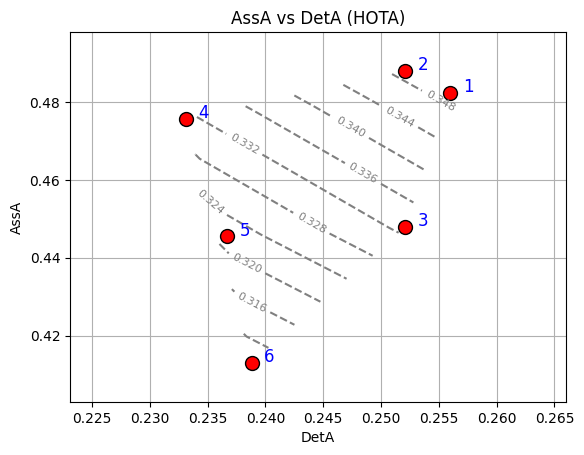

In [55]:
data1 = data[:6]
x = data1['DetA']
y = data1['AssA']
z = data1['HOTA']

# 그리드 생성
xi = np.linspace(min(x)-0.01, max(x)+0.01, 1000)
yi = np.linspace(min(y)-0.01, max(y)+0.01, 1000)
xi, yi = np.meshgrid(xi, yi)

# griddata를 사용하여 보간
zi = griddata((x, y), z, (xi, yi), method='linear')

# 선으로만 등고선 그래프 그리기
contours = plt.contour(xi, yi, zi, 10, colors='gray', linestyles='dashed',antialiased=True)
plt.clabel(contours, inline=True, fontsize=8)
plt.scatter(x, y, color='red', edgecolors='k', s=100)  # 원본 데이터 포인트 추가

# 데이터 포인트 인덱스를 등고선 위에 표시
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.text(xi+0.00155, yi+0.00155, str(i+1), color='blue', fontsize=12, ha='center', va='center')
    
plt.xlabel('DetA')
plt.ylabel('AssA')
plt.title('AssA vs DetA (HOTA)')
plt.grid(True)
plt.show()


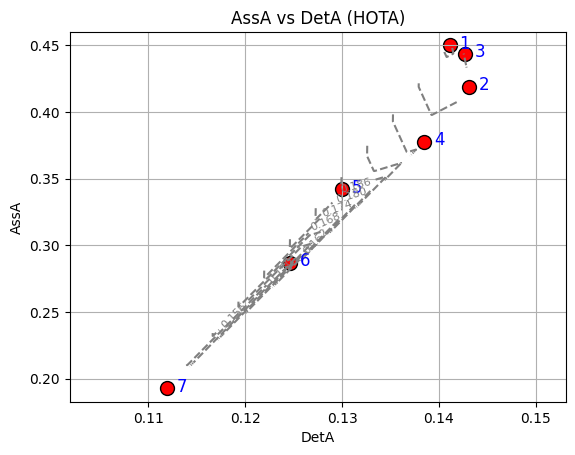

In [56]:
data2 = data[6:]
x = data2['DetA']
y = data2['AssA']
z = data2['HOTA']

# 그리드 생성
xi = np.linspace(min(x)-0.01, max(x)+0.01, 1000)
yi = np.linspace(min(y)-0.01, max(y)+0.01, 1000)
xi, yi = np.meshgrid(xi, yi)

# griddata를 사용하여 보간
zi = griddata((x, y), z, (xi, yi), method='linear')

# 선으로만 등고선 그래프 그리기
contours = plt.contour(xi, yi, zi, 10, colors='gray', linestyles='dashed',antialiased=True)
plt.clabel(contours, inline=True, fontsize=8)
plt.scatter(x, y, color='red', edgecolors='k', s=100)  # 원본 데이터 포인트 추가

# 데이터 포인트 인덱스를 등고선 위에 표시
for i, (xi, yi) in enumerate(zip(x, y)):
    plt.text(xi+0.00155, yi+0.00155, str(i+1), color='blue', fontsize=12, ha='center', va='center')
    
plt.xlabel('DetA')
plt.ylabel('AssA')
plt.title('AssA vs DetA (HOTA)')
plt.grid(True)
plt.show()
